<a href="https://colab.research.google.com/github/sungrae98/KaggleDataset/blob/main/2022_MLB_Player_Stats_By_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2022 MLB Player Stats By Team**

dataset - 2022 MLB player stats in Kaggle


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import codecs

In [ ]:
%pwd
# present working directory (현재 작업 폴더)

'/content'

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Batting

- Rk : Rank
- Name : Player name
- Age : Player's age
- Tm : Team
- Lg : League
- G : Games Played
- PA : Plate appearances
- AB : At bats
- R : Runs scored/allowed
- H : Hits/hits allowed
- 2B : Doubles hit/allowed
- 3B : Triples hit/allowed
- HR : Home runs hit/allowed
- RBI : Runs batted in
- SB : Stolen bases
- CS : Caught stealing
- BB : Bases on balls/walks
- SO : Strikeouts
- BA : Hits/at bats
- OBP : (H + BB + HBP) / (AB + BB + HBP + SF)
- SLG : Total bases/at bats or (1B + 2 * 2B + 3 * 3B + 4 * HR) / AB
- OPS : On-base + Slugging percentages
- OPS+ : 100 * (OBP / logOBP + SLG / logSLG - 1)
- TB : Total bases
- GDP : Double plays grounded into
- HBP : Times hit by a pitch
- SH : Sacrifice hits
- SF : Sacrifice flies
- IBB : Intentional bases on balls

In [ ]:
pathB0 = '/content/drive/MyDrive/BaseballData/2022-MLB-Player-Stats-Batting.csv'
with codecs.open(pathB0, 'r', 'utf-8', 'ignore') as f:
  dataB0 = pd.read_csv(f,sep=';')

In [ ]:
# 데이터 열
print(dataB0.columns.tolist())

['Rk', 'Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB']


In [ ]:
print(dataB0.head())

   Rk         Name  Age   Tm  Lg   G   PA   AB   R   H  ...    OBP    SLG  \
0   1    CJAbrams*   21  TOT  NL  90  302  284  33  70  ...  0.280  0.324   
1   2    CJAbrams*   21  SDP  NL  46  139  125  16  29  ...  0.285  0.320   
2   3    CJAbrams*   21  WSN  NL  44  163  159  17  41  ...  0.276  0.327   
3   4  AlbertAbreu   26  TOT  AL   1    0    0   0   0  ...  0.000  0.000   
4   5  AlbertAbreu   26  KCR  AL   1    0    0   0   0  ...  0.000  0.000   

     OPS  OPS+  TB  GDP  HBP  SH  SF  IBB  
0  0.604    76  92    5    9   2   2    0  
1  0.605    77  40    4    6   2   2    0  
2  0.603    75  52    1    3   0   0    0  
3  0.000     0   0    0    0   0   0    0  
4  0.000     0   0    0    0   0   0    0  

[5 rows x 29 columns]


In [ ]:
#홈런 개수로 내림차순
dataB0=dataB0.sort_values('HR', ascending=False)
#AL리그, Plate Appearance = PA
dataB1=dataB0[dataB0['Lg']=='AL'][dataB0['PA']>=502//2] #regular turn at bat//2
#OPS = On-base Plus Slugging (타자를 평가하는 스탯 중 하나로 '출루율 + 장타율')
dataB2=dataB1[['Name', 'Tm', 'HR', 'OPS']]
display(dataB2)

<ipython-input-39-efd1c342ac26>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataB1=dataB0[dataB0['Lg']=='AL'][dataB0['PA']>=502//2] #regular turn at bat//2


,Name,Tm,HR,OPS
452,AaronJudge,NYY,62,1.111
910,MikeTrout,LAA,40,0.999
37,YordanAlvarez*,HOU,37,1.019
653,ShoheiOhtani*,LAA,34,0.875
816,CoreySeager*,TEX,33,0.772
...,...,...,...,...
837,JoshH.Smith*,TEX,2,0.556
74,TuckerBarnhart*,DET,1,0.554
526,VimaelMachn*,OAK,1,0.587
513,NickyLopez*,KCR,0,0.554


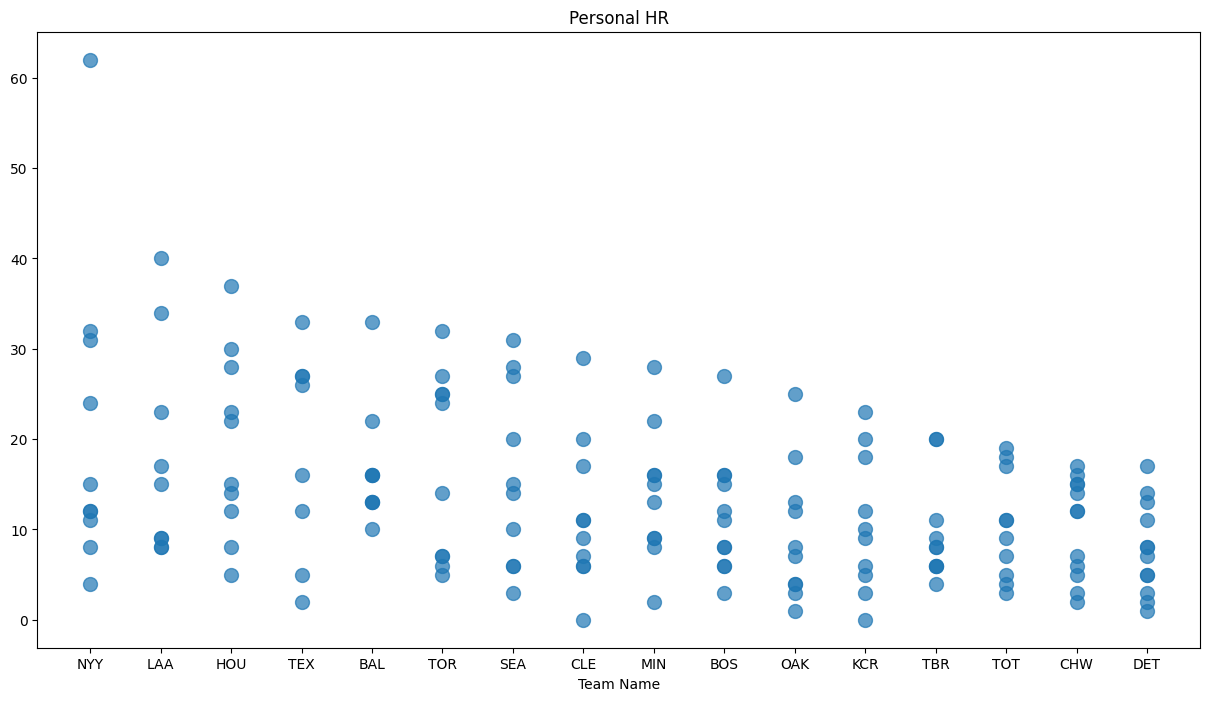

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(dataB2['Tm'], dataB2['HR'], alpha=0.7, s=100)
plt.title("Personal HR")
plt.xlabel("Team Name")
plt.show()

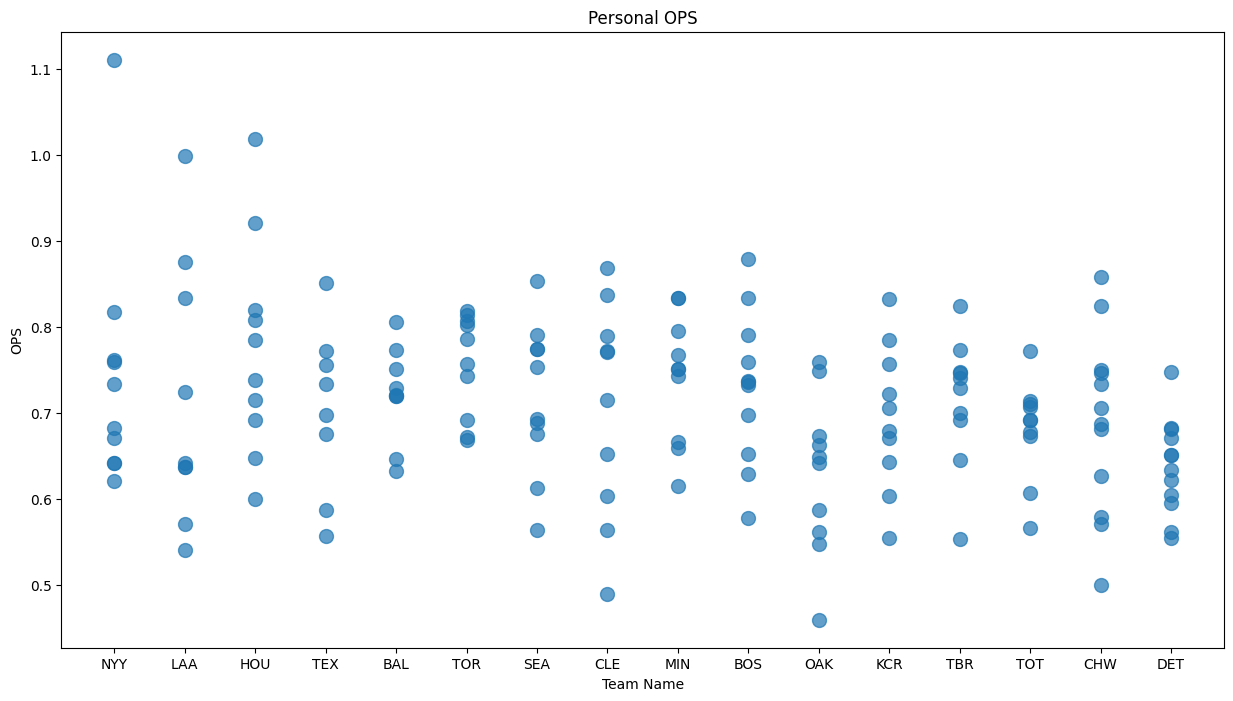

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(dataB2['Tm'], dataB2['OPS'], alpha=0.7, s=100)
plt.title("Personal OPS")
plt.xlabel("Team Name")
plt.ylabel("OPS")
plt.show()

###Pitching

- Rk : Rank
- Name : Player name
- Age : Player's age
- Tm : Team
- Lg : League
- W : Wins
- L : Losses
- W-L% : Win-Loss percentage
- ERA : 9 * ER / IP
- G : Games played
- GS : Games started
- GF : Games finished
- CG : Complete game
- SHO : Shutouts
- SV : Saves
- IP : Innings pitched
- H : Hits/Hits allowed
- R : Runs scored/allowed
- ER : Earned runs allowed
- HR : Home runs hit/allowed
- BB : Bases on balls/walks
- IBB : Intentional bases on balls
- SO : Strikeouts
- HBP : Times hit by a pitch
- BK : Balks
- WP : Wild pitches
- BF : Batters faced
- ERA+ : 100 * (logERA/ERA)
- FIP : Fielding independent pitching. Measures a pitcher's effectiveness at HR, BB, HBP and causing SO.
- WHIP : (BB + H) / IP
- H9 : 9 * H / IP
- HR9 : 9 * HR / IP
- BB9 : 9 * BB / IP
- SO9 : 9 * SO / IP
- SO/W : SO / W

In [ ]:
pathP0 = '/content/drive/MyDrive/BaseballData/2022 MLB Player Stats - Pitching.csv'
with codecs.open(pathP0, 'r', 'utf-8', 'ignore') as f:
  dataP0 = pd.read_csv(f,sep=';')

In [ ]:
print(dataP0.columns.tolist())

['Rk', 'Name', 'Age', 'Tm', 'Lg', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'SHO', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W']


In [ ]:
#CG(Complete Game 선발 투수가 다른 투수로 교체되지 않고 경기를 끝까지 책임지는 행위)
#SO(ShutOut CG에서 단 한점도 허용하지 않는 행위를 더해 계산하는 것, 완봉승)
dataP0=dataP0.sort_values('SO',ascending=False)
#IP(Inning Pitched 투구를 한 이닝 수를 의미, K는 strikeout)
dataP1=dataP0[dataP0['Lg']=='AL'][dataP0['IP']>=162//2] #regular pitching inning//2
dataP2=dataP1[['Name','Tm','SO','ERA']]
display(dataP2)

<ipython-input-61-ee0cc9d0c745>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataP1=dataP0[dataP0['Lg']=='AL'][dataP0['IP']>=162//2] #regular pitching inning//2


,Name,Tm,SO,ERA
204,GerritCole,NYY,257,3.50
171,DylanCease,CHW,227,2.20
709,ShoheiOhtani,LAA,219,2.33
789,RobbieRay*,SEA,212,3.71
350,KevinGausman,TOR,205,3.35
...,...,...,...,...
424,JonathanHeasley,KCR,70,5.28
464,DrewHutchison,DET,68,4.53
1021,SpenserWatkins,BAL,63,4.70
18,TylerAlexander*,DET,61,4.81


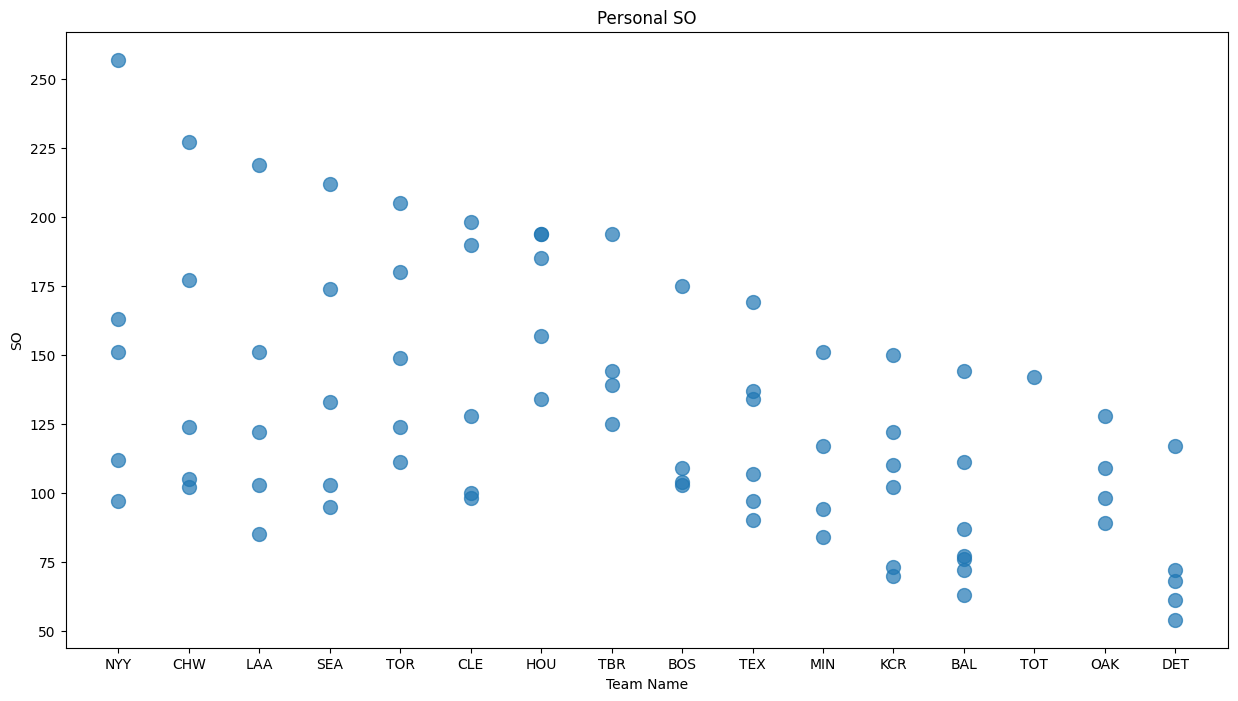

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(dataP2['Tm'], dataP2['SO'], alpha=0.7, s=100)
plt.title("Personal SO")
plt.xlabel("Team Name")
plt.ylabel("SO")
plt.show()

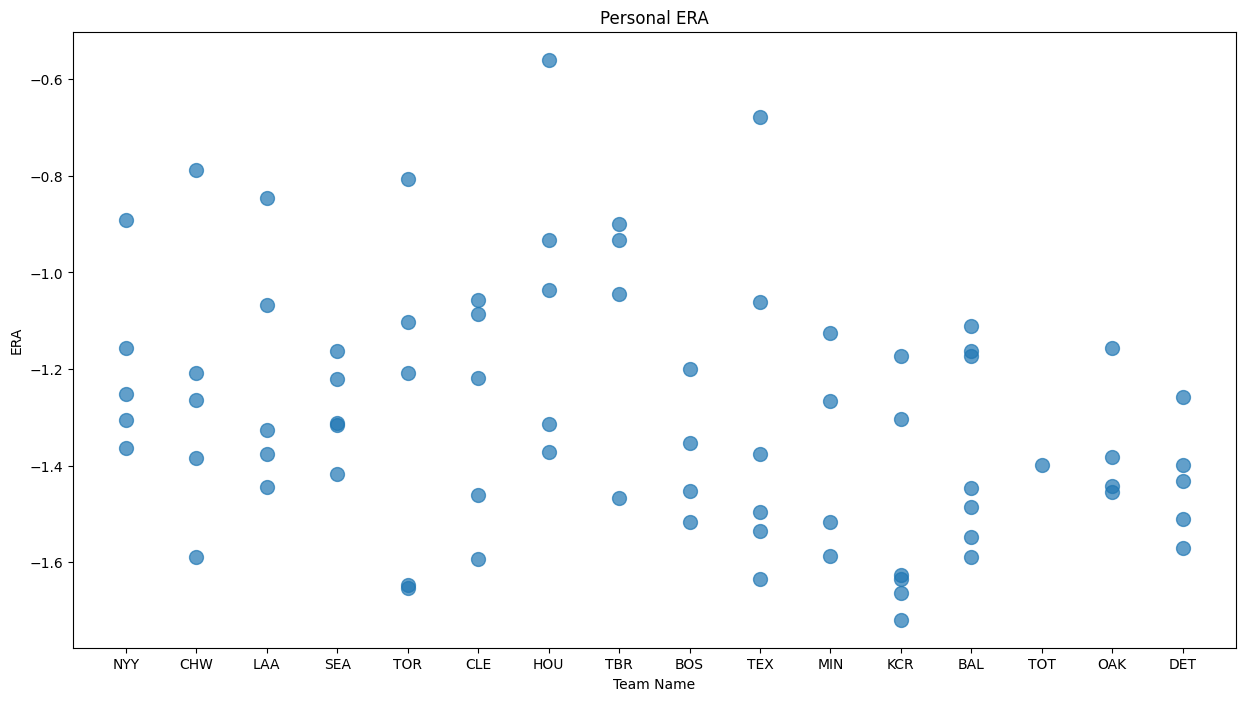

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(dataP2['Tm'], dataP2['ERA'].apply(lambda x:-np.log(x)), alpha=0.7, s=100)
plt.title("Personal ERA")
plt.xlabel("Team Name")
plt.ylabel("ERA")
plt.show()